In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("combined-season-data.csv");

In [5]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,own_goals_pgw,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
bonus_pgw               float64
bps_pgw                 float64
clean_sheets_pgw        float64
creativity_pgw          float64
goals_conceded_pgw      float64
goals_scored_pgw        float64
ict_index_pgw           float64
influence_pgw           float64
minutes_pgw             float64
own_goals_pgw           float64
penalties_missed_pgw    float64
penalties_saved_pgw     float64
red_cards_pgw           float64
result_pgw              float64
saves_pgw               float64
threat_pgw              float64
yellow_cards_pgw        float64
total_points_pgw        float64
total_points            float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,69047.0,2017.052312,0.903083,2016.0,2016.0,2017.0,2018.0,2019.00
GW,69047.0,19.487769,11.343298,1.0,9.0,20.0,30.0,38.00
at_home,69047.0,0.498588,0.500002,0.0,0.0,0.0,1.0,1.00
player_id,69047.0,487.164714,295.528292,1.0,239.0,478.0,701.0,1211.00
opponent_id,69047.0,12.015294,7.253878,1.0,5.0,11.0,18.0,29.00
champion_ls,69047.0,0.050560,0.219099,0.0,0.0,0.0,0.0,1.00
top5_ls,69047.0,0.251799,0.434050,0.0,0.0,0.0,1.0,1.00
bottom5_ls,69047.0,0.248657,0.432238,0.0,0.0,0.0,0.0,1.00
promoted_ts,69047.0,0.149261,0.356348,0.0,0.0,0.0,0.0,1.00
assists_pgw,69047.0,0.037221,0.204883,0.0,0.0,0.0,0.0,3.00


In [8]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [9]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, 
                                                    random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.70, 
                                                    random_state=random_state)

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train);

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
X_val_scaled = scaler.transform(X_val)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [15]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (48332, 26)
y train shape:  (48332, 1)


In [16]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (6215, 26)
y test shape:  (6215, 1)


In [17]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (14500, 26)
y val shape:  (14500, 1)


In [18]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
#     model.add(Dense(32, input_dim=dim, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(16, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(8, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(4, activation="elu"));
#     model.add(Dropout(dropout));
#     model.add(Dense(2, activation="elu"));
#     model.add(Dropout(dropout));
    
    model.add(Dense(1024, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(512, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(256, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(128, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(64, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(32, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"));
 
    # return our model
    return model

In [19]:
model = create_mlp(X_train.shape[1], dropout=0.3, l2_reg=0.1, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W0928 08:44:30.600147 4457973184 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0928 08:44:30.615557 4457973184 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 08:44:30.618648 4457973184 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0928 08:44:30.643406 4457973184 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0928 08:44:30.652335 4457973184 deprecati

In [20]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [21]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=500, shuffle=True, batch_size=128, callbacks=[es], verbose=1)

W0928 08:44:31.236298 4457973184 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48332 samples, validate on 14500 samples
Epoch 1/500
48332/48332 [==============================] - 7s 147us/step - loss: 94.4880 - val_loss: 56.7470
Epoch 2/500
48332/48332 [==============================] - 6s 131us/step - loss: 36.1872 - val_loss: 21.3274
Epoch 3/500
48332/48332 [==============================] - 6s 128us/step - loss: 14.3847 - val_loss: 9.4731
Epoch 4/500
48332/48332 [==============================] - 6s 128us/step - loss: 7.2330 - val_loss: 5.5613
Epoch 5/500
48332/48332 [==============================] - 6s 129us/step - loss: 4.7704 - val_loss: 4.1180
Epoch 6/500
48332/48332 [==============================] - 6s 129us/step - loss: 3.8218 - val_loss: 3.5251
Epoch 7/500
48332/48332 [==============================] - 6s 130us/step - loss: 3.4184 - val_loss: 3.2647
Epoch 8/500
48332/48332 [==============================] - 7s 135us/step - loss: 3.2290 - val_loss: 3.1346
Epoch 9/500
48332/48332 [==============================] - 6s 131us/step - loss: 3.1353 -

48332/48332 [==============================] - 6s 129us/step - loss: 2.9127 - val_loss: 2.8933
Epoch 77/500
48332/48332 [==============================] - 6s 129us/step - loss: 2.9009 - val_loss: 2.8889
Epoch 78/500
48332/48332 [==============================] - 6s 129us/step - loss: 2.9028 - val_loss: 2.8846
Epoch 79/500
48332/48332 [==============================] - 6s 128us/step - loss: 2.8962 - val_loss: 2.8851
Epoch 80/500
48332/48332 [==============================] - 6s 130us/step - loss: 2.9122 - val_loss: 2.8884
Epoch 81/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.9021 - val_loss: 2.8881
Epoch 82/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8913 - val_loss: 2.8858
Epoch 83/500
48332/48332 [==============================] - 6s 130us/step - loss: 2.8977 - val_loss: 2.8929
Epoch 84/500
48332/48332 [==============================] - 6s 130us/step - loss: 2.9063 - val_loss: 2.8863
Epoch 85/500
48332/48332 [===============

48332/48332 [==============================] - 6s 132us/step - loss: 2.8655 - val_loss: 2.8534
Epoch 152/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8621 - val_loss: 2.8408
Epoch 153/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8542 - val_loss: 2.8452
Epoch 154/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8595 - val_loss: 2.8448
Epoch 155/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8663 - val_loss: 2.8407
Epoch 156/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8552 - val_loss: 2.8573
Epoch 157/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8571 - val_loss: 2.8376
Epoch 158/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8539 - val_loss: 2.8683
Epoch 159/500
48332/48332 [==============================] - 6s 133us/step - loss: 2.8624 - val_loss: 2.8425
Epoch 160/500
48332/48332 [======

48332/48332 [==============================] - 6s 131us/step - loss: 2.8363 - val_loss: 2.8137
Epoch 227/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8306 - val_loss: 2.8196
Epoch 228/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8341 - val_loss: 2.8150
Epoch 229/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8305 - val_loss: 2.8148
Epoch 230/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8309 - val_loss: 2.8142
Epoch 231/500
48332/48332 [==============================] - 6s 131us/step - loss: 2.8244 - val_loss: 2.8348
Epoch 232/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8290 - val_loss: 2.8141
Epoch 233/500
48332/48332 [==============================] - 6s 132us/step - loss: 2.8275 - val_loss: 2.8139
Epoch 234/500
48332/48332 [==============================] - 6s 133us/step - loss: 2.8325 - val_loss: 2.8128
Epoch 235/500
48332/48332 [======

In [22]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [23]:
y_true = np.array(y_test["total_points"]);

In [24]:
y_pred = model.predict(X_test_scaled);

In [25]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [26]:
pred_df["in_range"] = pred_df.apply(lambda row: True if 
                                    (row["Actual"] - row["Predicted"]) <= 1 else False, axis=1)


In [27]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.88


In [46]:
pred_df.sort_values(["Actual"], ascending=False)

,Actual,Predicted,in_range
2608,17.750000,2.539378,False
1748,11.250000,2.161139,False
5731,11.250000,1.833284,False
2192,11.250000,1.756652,False
1823,10.500000,0.624561,False
5130,9.500000,2.888612,False
3501,9.500000,2.485424,False
3896,9.000000,2.865676,False
1507,8.333333,2.903783,False
3522,8.250000,2.486121,False


In [29]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,0.410312,True
1,2.0,2.345942,True
2,0.0,1.167372,True
3,2.0,2.254446,True
4,0.0,0.455655,True
5,1.0,2.446317,True
6,0.0,0.506247,True
7,0.0,0.491785,True
8,0.0,1.131821,True
9,0.0,0.634412,True


In [30]:
test_df = pred_df.head(25)

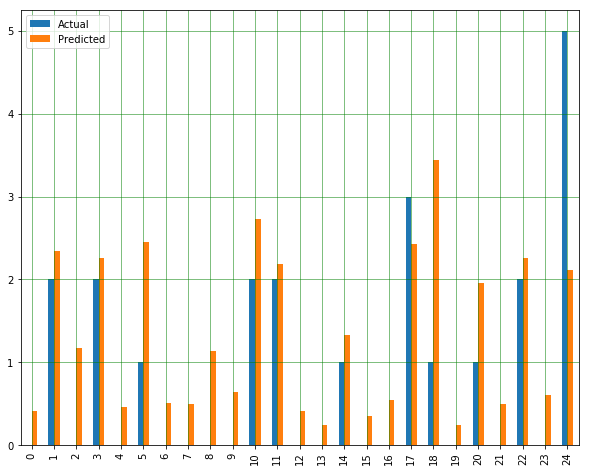

In [31]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

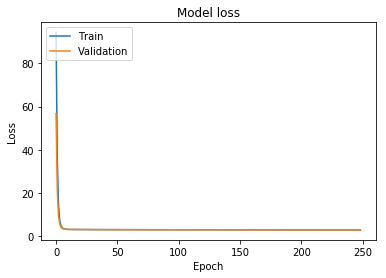

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0046572461568208
R2 score: 0.26065893405899865
Mean Squared Error: 2.4957033070207864
Root Mean Squared Error: 1.5797795121537646


In [34]:
player_id_df = pd.read_csv("player_id_map.csv");

In [35]:
team_id_df = pd.read_csv("team_id_map.csv");

In [63]:
# load and the test weekly fpl scrape
gw=7
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [64]:
weekly_scrape_scaled = scaler.transform(weekly_scrape[X_test.columns]);

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [65]:
y_pred_weekly = model.predict(weekly_scrape_scaled);

In [66]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 
                                 'position': list(weekly_scrape["position"]),
                                 'predicted': y_pred_weekly.flatten()});


In [67]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [68]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [69]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "position", "player_name", "opponent", "predicted"]];

In [106]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,position,player_name,opponent,predicted
10,385,MID,Kevin De Bruyne,Everton,3.586869
3,514,DEF,Nicolás Otamendi,Everton,2.996146
14,858,FWD,Pierre-Emerick Aubameyang,Manchester United,2.766384
2,648,DEF,Trent Alexander-Arnold,Sheffield United,2.700203
0,176,GK,David de Gea,Arsenal,2.552576
6,1154,DEF,John Lundstram,Liverpool,2.354345
4,977,DEF,Issa Diop,Bournemouth,2.343517
8,267,MID,Harry Wilson,West Ham United,2.217601
11,1206,MID,Todd Cantwell,Crystal Palace,2.201609
13,1204,FWD,Teemu Pukki,Crystal Palace,2.169032


In [200]:
cond_gk_min = 1;

cond_def_min = 3;
cond_def_max = 5;

cond_mid_min = 2;
cond_mid_max = 5;

cond_fwd_min = 1;
cond_fwd_max = 3;

In [211]:
def selectTeam(df, max_players=11):
    best11 = y_pred_weekly_df.sort_values(["predicted"], ascending=False)
    df_ = pd.DataFrame(columns=best11.columns);

    for index, row in best11.iterrows():
        num_gk = df_[df_["position"] == "GK"].shape[0];
        num_def = df_[df_["position"] == "DEF"].shape[0];
        num_mid = df_[df_["position"] == "MID"].shape[0];
        num_fwd = df_[df_["position"] == "FWD"].shape[0];
        num_players = df_.shape[0];
        
        position = row["position"];
    
        if (position == "GK" and num_gk < cond_gk_min and num_players < max_players):
            df_ = df_.append(row);
        if (position == "DEF" and (num_def < cond_def_min or 
            (num_def >= cond_def_min and num_def <= cond_def_max)) and num_players < max_players):
            df_ = df_.append(row);
        if (position == "MID" and (num_mid < cond_mid_min or 
            (num_mid >= cond_mid_min and num_mid <= cond_mid_max)) and num_players < max_players):
            df_ = df_.append(row);
        if (position == "FWD" and (num_fwd < cond_fwd_min or 
            (num_fwd >= cond_fwd_min and num_fwd <= cond_fwd_max)) and num_players < max_players):
            df_ = df_.append(row);
    
    gk = list(df_[df_["position"] == "GK"]["player_name"])
    defenders = list(df_[df_["position"] == "DEF"]["player_name"])
    mids = list(df_[df_["position"] == "MID"]["player_name"])
    fwds = list(df_[df_["position"] == "FWD"]["player_name"])
    
    selectedTeam = pd.DataFrame(columns=df_.columns);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "GK"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "DEF"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "MID"]);
    selectedTeam = selectedTeam.append(df_[df_["position"] == "FWD"]);
    
    selectedTeam["predicted"] = selectedTeam["predicted"].apply(lambda pred: round(pred, 0))
    
    return selectedTeam

In [212]:
best11 = selectTeam(y_pred_weekly_df);

In [213]:
best11

,player_id,position,player_name,opponent,predicted
0,176,GK,David de Gea,Arsenal,3.0
3,514,DEF,Nicolás Otamendi,Everton,3.0
2,648,DEF,Trent Alexander-Arnold,Sheffield United,3.0
6,1154,DEF,John Lundstram,Liverpool,2.0
4,977,DEF,Issa Diop,Bournemouth,2.0
10,385,MID,Kevin De Bruyne,Everton,4.0
8,267,MID,Harry Wilson,West Ham United,2.0
11,1206,MID,Todd Cantwell,Crystal Palace,2.0
9,1176,MID,Mason Mount,Brighton and Hove Albion,2.0
14,858,FWD,Pierre-Emerick Aubameyang,Manchester United,3.0


In [214]:
sum(best11["predicted"])

28.0